In [1]:
from IPython.display import HTML
from IPython.display import display

# Taken from https://stackoverflow.com/questions/31517194/how-to-hide-one-specific-cell-input-or-output-in-ipython-notebook
tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.cell.code_cell.rendered.selected div.input').hide();
    } else {
        $('div.cell.code_cell.rendered.selected div.input').show();
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
Some hidden code... to show/hide this cell's raw code input, click (or double click if stubborn!) <a href="javascript:code_toggle()">here</a>.''')
display(tag)

############### Write code below ##################
from IPython.core.display import HTML
def css_styling():
    styles = open("./STUFF/colors.css", "r").read()
    return HTML(styles)
css_styling()

<div class=warn>
These blue boxes contain instructions for you to follow, or stuff for you to do
<h2>How to access this Jupyter notebook</h2>

* <b>Step 1</b>: Open a web browser, go to [this page](https://warwick.ac.uk/fac/sci/chemistry/research/maurer/maurergroup/software/iatl_strategic_project/), scroll down, download the Login App (the Windows exacutable if using ITS machines) and double click on the executable (usually ended up into the Download folder) <br>
* <b>Step 2</b>: The Notebook Launcher pops up: select the CH273 module and fill in the boxes using your SCRTP username and password <br>
* <b>Step 3</b>: Open the Jupyter notebook you are interested in, e.g. KS_2_Class.ipynb <br>
* <b>Step 4</b>: Make a copy of the orginal notebook (which is read only). In the toolbar on top of the notebook: File - Make a Copy <br>
* <b>Step 5</b>: You're all set! <br><br>
<b> Remember: </b> You can access this notebook at home at any time by going through the same steps on e.g. your laptop - all the changes you have made will be saved and synced! At the moment, though, you'll have to tunnel through the campus network via VPN (see [here](https://warwick.ac.uk/services/its/servicessupport/networkservices/vpn/))<br>
<div/>

# CH273: Key Skills 2
## The Electronic Partition Function: a Pythonic Tale (Vol. II)

In this session, we are going to play around with the electronic partition function. As you know, our ultimate goal is that of being able to compute the equilibrium constant of chemical reactions (in the gas phase) via Statistical Mechanics. To this end, we need to write down the partition functions for all the species involved in said reaction. In turn, the partition function for a given specie can be decomposed (under certain circumstances!) into its translational, vibrational, rotational and... <b> electronic </b> contribution. The latter is the one ingredient we are going to deal with today.

### The Electronic Partition Function
As per usual, we are going to work within the canonical ensemble. As such, the electronic partition function can be written as:

$$
\large{q_{\text{Ele.}}=\sum_{i=1}^{N_i} e^{-\beta \epsilon_i^{\text{Ele}}}}
$$

The energy levels $\large{\epsilon_i^{\text{Ele}}}$ are the electronic states of the atom/molecule. As such, in principle the summation runs up to $\large{\infty}$:

$$
\large{q_{\text{Ele.}}=\sum_{i=1}^{\infty} e^{-\beta \epsilon_i^{\text{Ele}}}}
$$

In addition, qauntum mechanics tells us that electronic energy levels may very well be denegerate - i.e. different electronic states may have the same energy. Thus, we need to introduce a degeneracy factor $\large{g_i^{\text{Ele.}}}$ for the $i-th$ state:

$$
\large{q_{\text{Ele.}}=\sum_{i=1}^{\infty} g_i^{\text{Ele.}} e^{-\beta \epsilon_i^{\text{Ele}}}}
$$

### Choosing the zero of the energy levels
Exactly as we did in the case of the vibrational energy levels, we have to select the zero of our electronic energy levels. Unless specified otherwise, we are going to set this reference as equal to the electronic ground state $\large{\epsilon_1^{\text{Ele}}}$. Thus, the first term of the summation:

$$
\large{q_{\text{Ele.}}=\sum_{i=1}^{\infty} g_i^{\text{Ele.}} e^{-\beta \epsilon_i^{\text{Ele}}}}
$$

typically reduces to $\large{g_1^{\text{Ele.}}}$, as $\large{g_1^{\text{Ele.}}\cdot e^{-\beta \epsilon_1^{\text{Ele}}}= g_1^{\text{Ele.}}\cdot e^{0}=g_1^{\text{Ele.}}}$


### Dealing with the summation...
In principle, in order to compute the electronic partition function we need to sum inifinte energy levels. However, we shall see that this is hardly necessary. Take for example the hydrogen atom, which energy levels can be described by the simple relation:

$$
\large{\epsilon_i=\frac{E_0}{i^2} \text{ , with } E_0=-13.6 \text{eV}}
$$

What is the energy separation between them? Python may help!

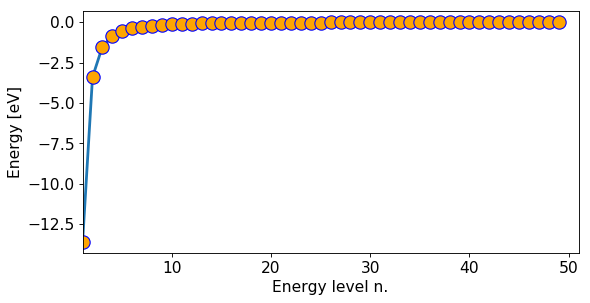

In [5]:
import numpy as np
# let's calculate the first 20 levels; we need a loop!
n_levels = 50
energy_zero=-13.6 # eV

energy_levels = np.zeros((n_levels,n_levels))
for i in range(1, n_levels):
    energy_levels[i,0] = i
    energy_levels[i,1] = energy_zero/(i*i)
    
# let's have a look...
%matplotlib notebook 
%matplotlib inline 
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 4), dpi= 80, facecolor='w', edgecolor='k') # figsize determine the actual size of the figure

plt.plot(energy_levels[:,0], energy_levels[:,1], linewidth=2.5)
plt.plot(energy_levels[:,0], energy_levels[:,1], 'o', markerfacecolor='orange', markersize=12, markeredgecolor='blue', 
         linewidth=2.5)

# Labeling of x and y axes
plt.xlabel('Energy level n.',fontsize=14)
plt.ylabel('Energy [eV]',fontsize=14)

axes = plt.gca()
axes.set_xlim([1,n_levels+1])
#axes.set_ylim([ymin,ymax])

plt.tick_params(axis='both', which='major', labelsize=14)
plt.tick_params(axis='both', which='minor', labelsize=14)

# Show the final result
plt.show()

As you can see, the separation between the energy of the ground state and that of the first excited state is huge ($\sim$10 eV). As this separation enters a negative exponential term within the expression of the partition function, chances are only the ground state will actual make a non-negligible contribution to the totoal value of $\large{q_{\text{Ele.}}}$

<div class=warn>

* Rescale the energy levels plotted above by taking the zero of the energy to be equal to $E_0$<br>
* Plot the rescaled energy levels <br>
<div/>

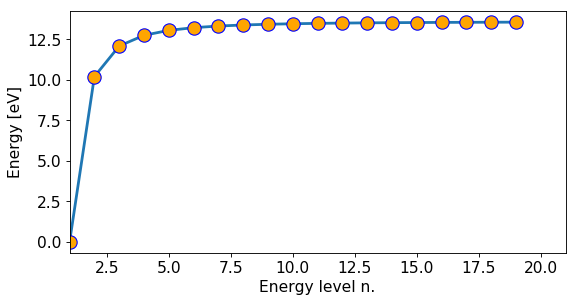

In [9]:
import numpy as np
# let's calculate the first 20 levels; we need a loop!
n_levels = 20
energy_zero=-13.6 # eV

energy_levels = np.zeros((n_levels,n_levels))
for i in range(1, n_levels):
    energy_levels[i,0] = i
    energy_levels[i,1] = energy_zero/(i*i)+13.6
    
# let's have a look...
%matplotlib notebook 
%matplotlib inline 
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 4), dpi= 80, facecolor='w', edgecolor='k') # figsize determine the actual size of the figure

plt.plot(energy_levels[:,0], energy_levels[:,1], linewidth=2.5)
plt.plot(energy_levels[:,0], energy_levels[:,1], 'o', markerfacecolor='orange', markersize=12, markeredgecolor='blue', 
         linewidth=2.5)

# Labeling of x and y axes
plt.xlabel('Energy level n.',fontsize=14)
plt.ylabel('Energy [eV]',fontsize=14)

axes = plt.gca()
axes.set_xlim([1,n_levels+1])
#axes.set_ylim([ymin,ymax])

plt.tick_params(axis='both', which='major', labelsize=14)
plt.tick_params(axis='both', which='minor', labelsize=14)

# Show the final result
plt.show()

In [3]:
# let's calculate the actual electronic partition function...

kb = 8.6173303e-05 # [ev/K]
T = 300 # [K]

q_ele_tot = 0.0
q_ele = np.zeros((n_levels,2))
q_ele_sum = np.zeros((n_levels,2))
for i in range(1, n_levels):
    q_ele[i,0] = i
    q_ele[i,1] = np.exp((energy_levels[i,1]-energy_zero)/(-kb*T)) # note the choice of the zero of energy!
    q_ele_tot = q_ele_tot + q_ele[i,1]
    q_ele_sum[i,0] = i
    q_ele_sum[i,1] = q_ele_tot
    

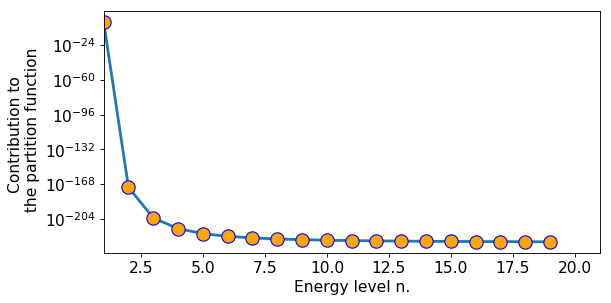

In [4]:
# let's have a look...
%matplotlib notebook 
%matplotlib inline 
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 4), dpi= 80, facecolor='w', edgecolor='k') # figsize determine the actual size of the figure

plt.plot(q_ele[:,0], q_ele[:,1], linewidth=2.5)
plt.plot(q_ele[:,0], q_ele[:,1], 'o', markerfacecolor='orange', markersize=12, markeredgecolor='blue', 
         linewidth=2.5)

# Labeling of x and y axes
plt.xlabel('Energy level n.',fontsize=14)
plt.ylabel('Contribution to \n the partition function',fontsize=14)

axes = plt.gca()
axes.set_xlim([1,n_levels+1])
plt.yscale('log')
#axes.set_ylim([ymin,ymax])

plt.tick_params(axis='both', which='major', labelsize=14)
plt.tick_params(axis='both', which='minor', labelsize=14) 

# Show the final result
plt.show()

Indeed, it would seem that only the ground state actualy matters - the contribution of the first excited state is some 200 orders of magnitude smaller! In this case - and in most cases! - the electronic partition function is then just equal to the degeneracy factor of the electronic ground state. However...

### The curious case of the NO molecule...
Some molecules are characterised by <i> low-lying electronically excited states </i>, i.e. excited electronic states which are close enough in energy to be accessible even at room temperature. In that case, we cannot simply ignore these excited states, as they will contribute to the electronic partition function.

To be specific, the ground state of NO is double degenerate, and separated by $\Delta E=$0.015 eV only from the first excited state, which is also double degenerate.

<div class=warn>

* Write down (in a Markdown cell) the expression for the electronic partition function of NO keeping into account the electronic ground state and the first excited state<br>
* Plot the value of the electronic partition function of NO as a function of temperature (best visualised if the temperature is rescaled in units of $k_BT/\Delta E$)<br>
* What values do you expect the electronic partition function of NO will assume at (a.) T=0 K and (b.) in the limit of incredibly high temperatures? Why?<br>
* Calculate the actual value of the the electronic partition function of NO at (a.) T=0 K and (b.) 10000 K. Does it make sense?
<div/>

$$
\large{q_{\text{Ele.}}=\sum_{i=1}^{N_i} e^{-\beta \epsilon_i^{\text{Ele}}}}
$$

$$
\large{q_{\text{Ele.}}=2+\exp(\frac{0.015}{-kb\times T})
$$

$$
\large{\epsilon_i=\frac{E_0}{i^2} \text{ , with } E_0=-13.6 \text{eV}}
$$

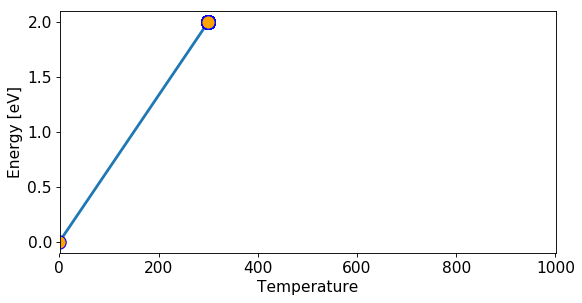

In [13]:
n_points = 1000
energy_delta=0.015 # eV

energy_levels = np.zeros((n_points,n_points))
for i in range(1, n_points):
    energy_levels[i,0] = T
    energy_levels[i,1] = np.exp((2-energy_delta)/(-kb*T))+2

# let's have a look...
%matplotlib notebook 
%matplotlib inline 
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 4), dpi= 80, facecolor='w', edgecolor='k') # figsize determine the actual size of the figure

plt.plot(energy_levels[:,0], energy_levels[:,1], linewidth=2.5)
plt.plot(energy_levels[:,0], energy_levels[:,1], 'o', markerfacecolor='orange', markersize=12, markeredgecolor='blue', 
         linewidth=2.5)

# Labeling of x and y axes
plt.xlabel('Temperature',fontsize=14)
plt.ylabel('Energy [eV]',fontsize=14)

axes = plt.gca()
axes.set_xlim([1,n_points+1])
#axes.set_ylim([ymin,ymax])

plt.tick_params(axis='both', which='major', labelsize=14)
plt.tick_params(axis='both', which='minor', labelsize=14)

# Show the final result
plt.show()


In [ ]:
%matplotlib notebook 
%matplotlib inline 
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 4), dpi= 80, facecolor='w', edgecolor='k') # figsize determine the actual size of the figure

plt.plot(energy_levels[:,0], energy_levels[:,1], linewidth=2.5)
plt.plot(energy_levels[:,0], energy_levels[:,1], 'o', markerfacecolor='orange', markersize=12, markeredgecolor='blue', 
         linewidth=2.5)

# Labeling of x and y axes
plt.xlabel('Temperature [kTE]',fontsize=14)
plt.ylabel('Energy [eV]',fontsize=14)

axes = plt.gca()
axes.set_xlim([1,n_levels+1])
#axes.set_ylim([ymin,ymax])

plt.tick_params(axis='both', which='major', labelsize=14)
plt.tick_params(axis='both', which='minor', labelsize=14)

# Show the final result
plt.show()